In [363]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = 'Imagens/test/'

In [364]:
def get_img(number):
    img = cv2.imread(f'{path}test_{number}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

bottles = []
for i in range(1,65):
  bottles.append(get_img(i))

In [365]:
dic = { 'CONTENT_HIGH': 0, 'CONTENT_LOW': 0, 'COVER_NONE': 0, 'BOTTLE_SMASHED': 0, 'LABEL_MISPLACED': 0, 'LABEL_WHITE': 0, 'LABEL_NONE': 0, 'BOTTLE_NONE': 0 }

In [366]:
def create_image_dict(bottle):
  image_dict = dict(dic) 
  return image_dict

# Lista de dicionários de imagens
image_dicts = [create_image_dict(bottle) for bottle in bottles]

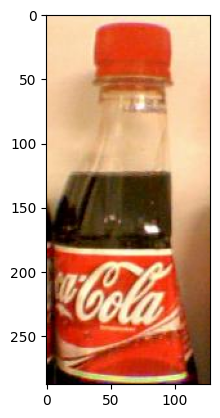

In [367]:
def mid_bottle(image): 
  # Define as coordenadas do retângulo de recorte (x, y, largura, altura)
  x = 110
  y = 0
  width = 133
  height = 300

  # Recorta a região da imagem
  bottle = image[y:y+height, x+5:x+width]
  return bottle

plt.imshow(mid_bottle(bottles[18]))

0


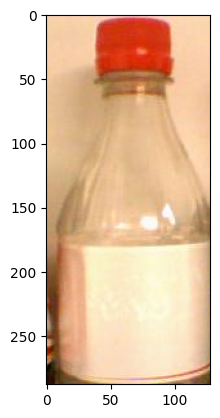

In [368]:
def none_bottle(image):
    # Calcule a cor média da imagem
    cor_media = cv2.mean(image)[:3]
    #print(cor_media)
    # Cor média quando não tem garrafa
    cor_fornecida = (224.52589129483815, 188.11871172353457, 153.8780894575678)

    # Limiar de diferença aceitável
    limiar = 11

    cor_media_arr = np.array(cor_media)
    cor_fornecida_arr = np.array(cor_fornecida)

    diferenca = np.abs(cor_media_arr - cor_fornecida_arr)
    #print(diferenca)
    if np.all(diferenca <= limiar):
        #Verificar se tem cor vermelha na imagem
        hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        lower_red = np.array([0, 100, 100])
        upper_red = np.array([10, 255, 255])
        mask = cv2.inRange(hsv, lower_red, upper_red)
        if cv2.countNonZero(mask) > 1000:
            return 0
        else:
            return 1

    else:
        return 0
img = mid_bottle(bottles[44])
plt.imshow(img)
print(none_bottle(img))

1


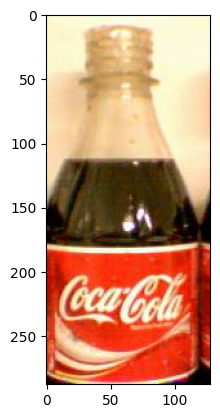

In [369]:
def none_cover(image):
    # Definindo as coordenadas da região da tampa
    x = 0
    y = 0
    width = 100
    height = 70

    # Recortando a região da tampa da garrafa
    cap_region = image[y:y+height, x:x+width]
    #plt.imshow(cap_region)

    # Convertendo a imagem para escala de cinza
    gray = cv2.cvtColor(cap_region, cv2.COLOR_RGB2GRAY)
    
    # Fazendo thresholding para destacar a cor vermelha
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    
    total_pixels = np.prod(thresh.shape)
    black_pixels = np.sum(thresh == 0)
    black_percentage = (black_pixels / total_pixels) * 100
    #print(black_percentage)
    if black_percentage > 10:
        return 0
    else:
        return 1
  
img = mid_bottle(bottles[24])
plt.imshow(img)
print(none_cover(img))

0


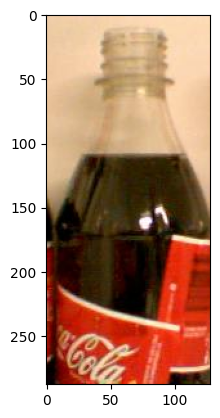

In [379]:
def none_label(image):
    # Definindo as coordenadas da região do rótulo
    x = 20
    y = 175
    width = 150
    height = 150

    # Recortando a região do rótulo
    label_region = image[y:y+height, x:x+width]

    # plt.imshow(label_region)

    # Segmentando com thresholding
    gray = cv2.cvtColor(label_region, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    
    total_pixels = np.prod(thresh.shape)
    black_pixels = np.sum(thresh == 0)
    black_percentage = (black_pixels / total_pixels) * 100
    #print(black_percentage)
    if black_percentage > 85:
        return 1
    else:
        return 0

img = mid_bottle(bottles[48])
plt.imshow(img)
print(none_label(img))

1


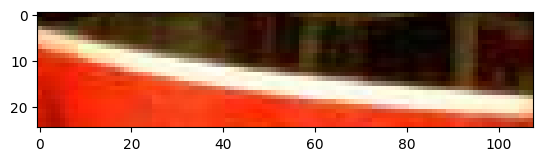

In [371]:
def label_mismatch(image):
    # Definindo as coordenadas da região do rótulo
    x = 20
    y = 175
    width = 150
    height = 25

    # Recortando a região do rótulo
    label_region = image[y:y+height, x:x+width]
    plt.imshow(label_region)
    # Convertendo a imagem para escala de cinza
    gray = cv2.cvtColor(label_region, cv2.COLOR_RGB2GRAY)
    # Obter o pixel médio 
    # Fazendo thresholding para destacar a cor preta
    _, thresh = cv2.threshold(gray, 100, 127, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    
    total_pixels = np.prod(thresh.shape)
    gray_pixels = np.sum(thresh == 127)
    gray_percentage = (gray_pixels / total_pixels) * 100
    
    #print(gray_percentage)
    if gray_percentage > 45:
        return 0
    else:
        return 1
img = mid_bottle(bottles[21])
plt.imshow(img)
print(label_mismatch(img))

1


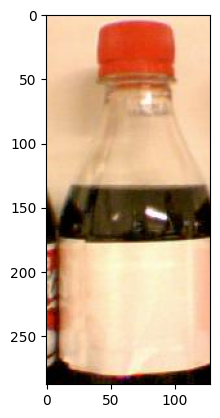

In [372]:
def none_label_white(image):
  # Definindo as coordenadas da região do rótulo
  x = 20
  y = 150
  width = 150
  height = 150

  # Recortando a região do rótulo
  label_region = image[y:y+height, x:x+width]
  #plt.imshow(label_region)
  
  gray_image = cv2.cvtColor(label_region, cv2.COLOR_RGB2GRAY)
  thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
  #plt.imshow(thresh)
  # Calculando a porcentagem de pixels brancos na imagem
  total_pixels = np.prod(thresh.shape)
  white_pixels = np.sum(thresh == 255)
  white_percentage = (white_pixels / total_pixels) * 100

  has_significant_white_area = white_percentage > 65

  if has_significant_white_area:
      return 1
  else:
      return 0

img = mid_bottle(bottles[3])
plt.imshow(img)
print(none_label_white(img))

0


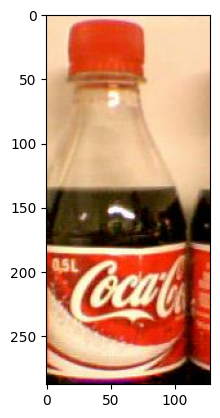

In [373]:
def high_content(image):
    x = 30
    y = 113
    width = 70
    height = 30

    content_region = image[y:y+height, x:x+width]
    #plt.imshow(content_region)

    gray_image = cv2.cvtColor(content_region, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    total_pixels = np.prod(thresh.shape)
    black_pixels = np.sum(thresh == 0)
    black_percentage = (black_pixels / total_pixels) * 100

    high_content = black_percentage > 65
    if high_content:
        return 1
    else:
        return 0
img = mid_bottle(bottles[1])
plt.imshow(img)
print(high_content(img))

1


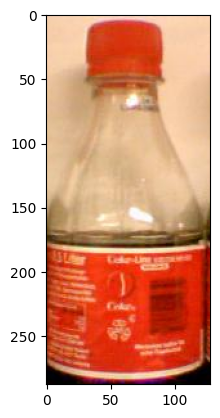

In [374]:
def low_content(image):
    x = 30
    y = 113
    width = 70
    height = 30

    content_region = image[y:y+height, x:x+width]
    #plt.imshow(content_region)
    gray_image = cv2.cvtColor(content_region, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
    #plt.imshow(thresh, cmap='gray')
    # Calculando a porcentagem de pixels pretos na imagem
    total_pixels = np.prod(thresh.shape)
    black_pixels = np.sum(thresh == 0)
    black_percentage = (black_pixels / total_pixels) * 100

    low_content = black_percentage < 10
    if low_content:
        return 1
    else:
        return 0
img = mid_bottle(bottles[4])
plt.imshow(img)
print(low_content(img))

1


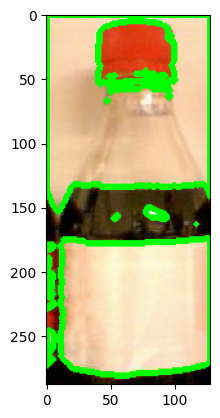

In [375]:
def deformed(image):
    # Obtendo o contorno da garrafa
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Desenhando o contorno na imagem original
    cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
    plt.imshow(image)
    # Calculando a área do contorno
    area = cv2.contourArea(contours[0])
    #print(area)
    if area < 8000:
        return 1
    else:
        return 0
    
img = mid_bottle(bottles[3])
plt.imshow(img)
print(deformed(img))
# Separar entre garrafas cheias, meio cheias, vazias

In [376]:
def classify_bottle(bottle, image_dict):
    if none_bottle(bottle):
        image_dict['BOTTLE_NONE'] = 1
    else:
        if none_cover(bottle):
            image_dict['COVER_NONE'] = 1
    
        if none_label(bottle):
            image_dict['LABEL_NONE'] = 1
        else:
            if none_label_white(bottle):
                image_dict['LABEL_WHITE'] = 1
            else:
                if label_mismatch(bottle):
                    image_dict['LABEL_MISPLACED'] = 1
            
    
        if high_content(bottle):
            image_dict['CONTENT_HIGH'] = 1
        elif low_content(bottle):
            image_dict['CONTENT_LOW'] = 1
    
    return image_dict


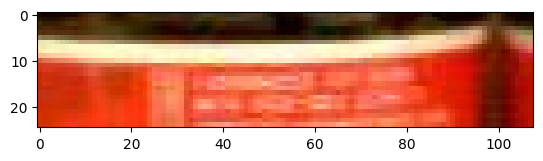

In [377]:
for i, image_dict in enumerate(image_dicts):
    # Obter a imagem correspondente ao dicionário
    #image_url = urls[i]  # Obter a URL da imagem
    image = bottles[i]  # Obter a imagem
    img = mid_bottle(image)
    # Classificar a imagem
    image_dict = classify_bottle(img, image_dict)

In [380]:
import csv

# Juntar todos os dicionários em uma lista
all_dicts = image_dicts

# Obter todas as chaves presentes em todos os dicionários
all_keys = set().union(*all_dicts)

# Nome do arquivo CSV
csv_filename = 'imagens.csv'

# Adicionar a chave 'Nome' ao conjunto de chaves
all_keys.add('Nome')

# Mover a chave 'Nome' para o início do conjunto de chaves
all_keys = ['Nome'] + sorted(list(all_keys - {'Nome'}))

# Abrir o arquivo CSV em modo de escrita
with open(csv_filename, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_keys)

    # Escrever o cabeçalho do CSV
    writer.writeheader()

    # Escrever cada dicionário como uma linha no CSV
    for i, image_dict in enumerate(all_dicts):
        image_dict['Nome'] = f"Imagem {i+1}"  # Adicionar o nome da imagem
        writer.writerow(image_dict)

